# Imports

In [1]:
from numpy import pi
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Constants

In [2]:
SHOTS = 4096

# Backend

In [3]:
backend = AerSimulator()
print(backend)

AerSimulator('aer_simulator')


# Circuit

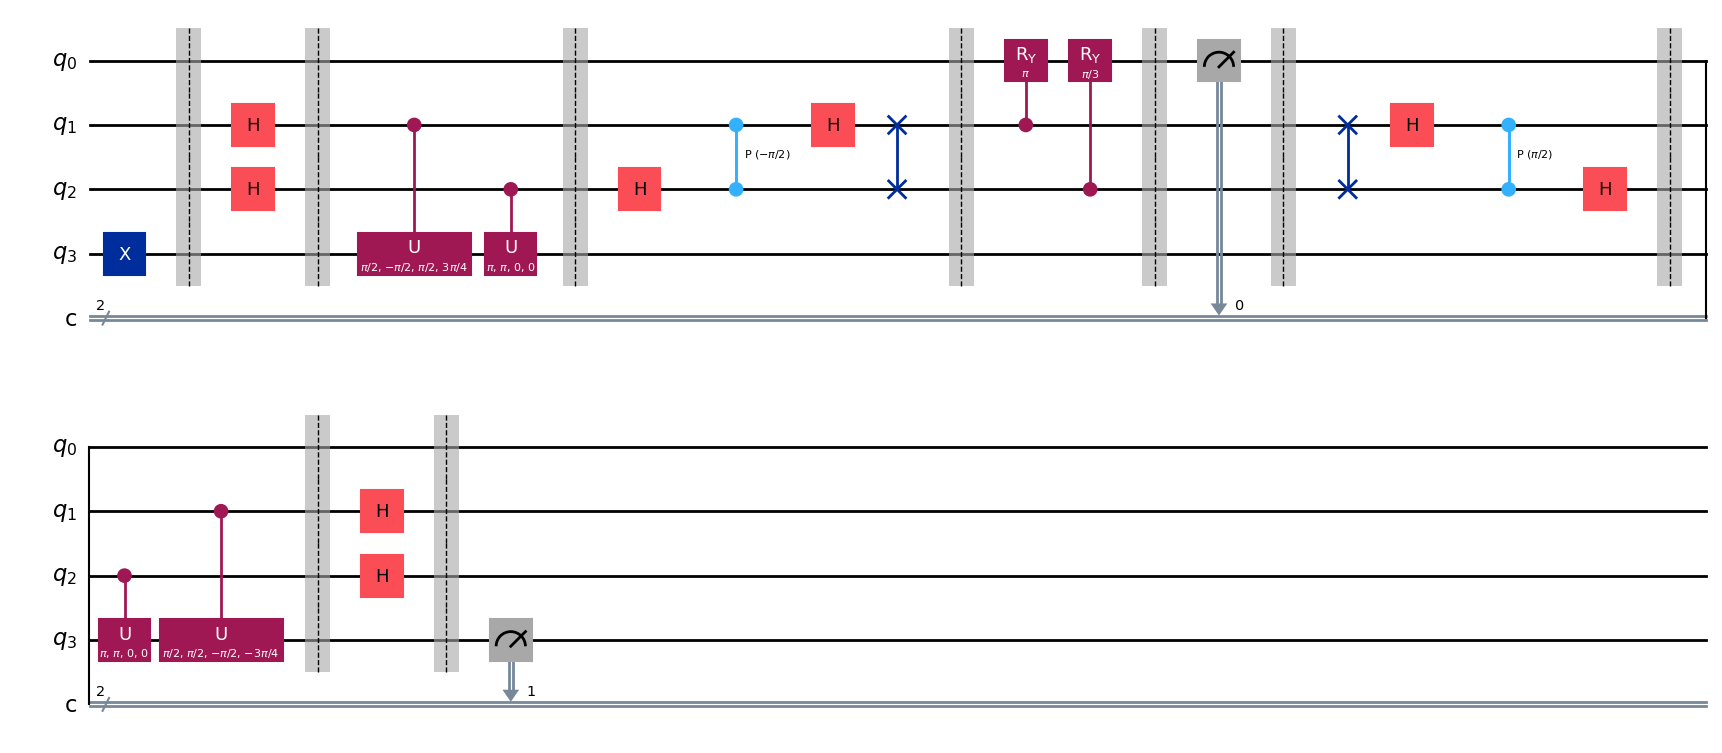

In [4]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cu(pi / 2, -pi / 2, pi / 2, 3 * pi / 4, qreg_q[1], qreg_q[3])
circuit.cu(pi, pi, 0, 0, qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[2])
circuit.cp(-pi / 2, qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.swap(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cry(pi, qreg_q[1], qreg_q[0])
circuit.cry(pi / 3, qreg_q[2], qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.swap(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cp(pi / 2, qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cu(pi, pi, 0, 0, qreg_q[2], qreg_q[3])
circuit.cu(pi / 2, pi / 2, -pi / 2, -3 * pi / 4, qreg_q[1], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.measure(qreg_q[3], creg_c[1])

circuit.draw(output='mpl')

# Results

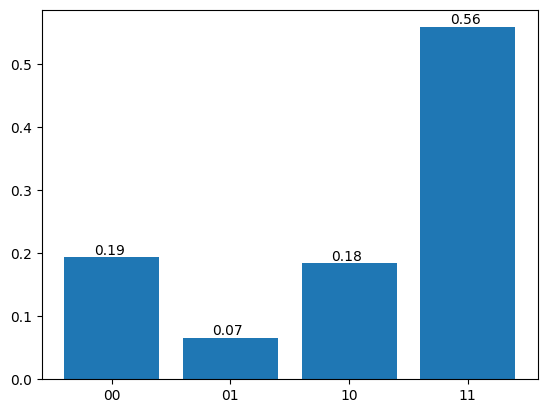

Simulated Ratio: 0.11728665207877462
Target Ratio:    0.1111111111111111


In [5]:
counts = backend.run(circuit, shots=SHOTS).result().get_counts()
counts = dict(sorted(counts.items()))
for label in counts:
    counts[label] = counts[label]/SHOTS

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))
xlocs, xlabs = plt.xticks()
for i, value in enumerate(counts.values()):
    plt.text(xlocs[i] - 0.15, value + 0.005, str(round(value, 2)))
plt.show()

print(f'Simulated Ratio: {counts["01"]/counts["11"]}')
print(f'Target Ratio:    {1./9.}')

In [2]:
outcome11 = 2741
outcome01 = 2139
print('IBM Brisbane')
print(f'Hardware Ratio:  {outcome01/outcome11}')
print(f'Target Ratio:    {1./9.}')

IBM Brisbane
Hardware Ratio:  0.7803721269609631
Target Ratio:    0.1111111111111111


In [3]:
outcome11 = 2956
outcome01 = 1668
print('IBM Kyiv')
print(f'Hardware Ratio:  {outcome01/outcome11}')
print(f'Target Ratio:    {1./9.}')

IBM Kyiv
Hardware Ratio:  0.564276048714479
Target Ratio:    0.1111111111111111
